# Privacy Evaluation

## Package Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
from grid import *

## Data Imports & Examination

In [14]:
# Importing data from a CSV file to a pandas dataframe
queries = pd.read_csv("queries.csv", sep=' ')
pois = pd.read_csv("pois.csv", sep=' ')

In [15]:
print("Number of queries: " + str(queries.shape))
print("Number of POIS: " + str(pois.shape))

Number of queries: (20443, 5)
Number of POIS: (1060, 5)


In [17]:
queries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20443 entries, 0 to 20442
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ip_address      20443 non-null  object 
 1   lat             20443 non-null  float64
 2   lon             20443 non-null  float64
 3   timestamp       20443 non-null  float64
 4   poi_type_query  20443 non-null  object 
dtypes: float64(3), object(2)
memory usage: 798.7+ KB


In [20]:
queries.nunique()

ip_address         200
lat                809
lon                809
timestamp         9739
poi_type_query       7
dtype: int64

In [26]:
pois.nunique()

poi_id      1060
cell_id      100
poi_type      12
lat         1060
lon         1060
dtype: int64

In [27]:
display(queries.head(n=3))

,ip_address,lat,lon,timestamp,poi_type_query
0,34.101.177.245,46.532942,6.591174,14.912448,cafeteria
1,34.101.177.245,46.532942,6.591174,14.912448,restaurant
2,34.101.177.245,46.550342,6.602852,18.024657,restaurant


In [28]:
display(pois.head(n=3))

,poi_id,cell_id,poi_type,lat,lon
0,307,1,bar,46.504486,6.559631
1,331,1,bar,46.500259,6.554721
2,578,1,supermarket,46.506017,6.551165


In [29]:
display(queries[queries.ip_address == queries.ip_address[0]])

,ip_address,lat,lon,timestamp,poi_type_query
0,34.101.177.245,46.532942,6.591174,14.912448,cafeteria
1,34.101.177.245,46.532942,6.591174,14.912448,restaurant
2,34.101.177.245,46.550342,6.602852,18.024657,restaurant
3,34.101.177.245,46.550342,6.602852,18.024657,cafeteria
4,34.101.177.245,46.532942,6.591174,36.334539,cafeteria
...,...,...,...,...,...
97,34.101.177.245,46.549326,6.609645,449.874300,club
98,34.101.177.245,46.550342,6.602852,464.003712,dojo
99,34.101.177.245,46.549880,6.609449,464.003712,cafeteria
100,34.101.177.245,46.520562,6.577343,464.003712,restaurant


In [32]:
display(queries.describe())

,lat,lon,timestamp
count,20443.000000,20443.000000,20443.000000
mean,46.539054,6.602624,238.874941
std,0.016432,0.025363,139.502195
min,46.500091,6.550164,0.621729
25%,46.526787,6.581744,112.625695
50%,46.537174,6.602852,236.325009
75%,46.551689,6.622811,371.802648
max,46.569737,6.649893,465.996996


## Data Analysis

In [34]:
poi_types = pois['poi_type'].unique()
list(poi_types)

['bar',
 'supermarket',
 'club',
 'restaurant',
 'cafeteria',
 'gym',
 'dojo',
 'appartment_block',
 'villa',
 'office',
 'laboratory',
 'company']

In [36]:
poi_types_q = queries['poi_type_query'].unique()
list(poi_types_q)

['cafeteria', 'restaurant', 'dojo', 'club', 'bar', 'supermarket', 'gym']

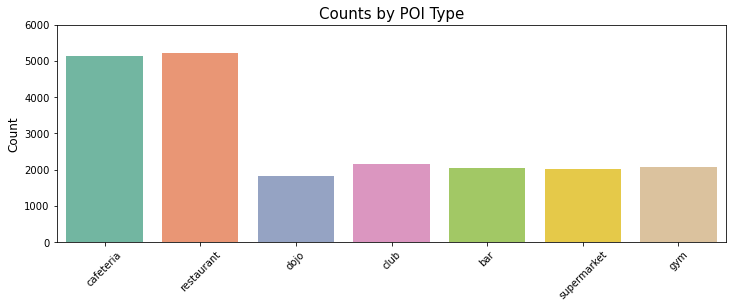

In [51]:
plt.figure(figsize = (12,4))

g = sns.countplot(x=queries['poi_type_query'], palette="Set2", order=poi_types_q)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counts by POI Type", fontsize=15)
g.set_xlabel("", fontsize=15)
g.set_ylabel("Count", fontsize=12)
g.set(ylim=(0, 6000))

plt.show()

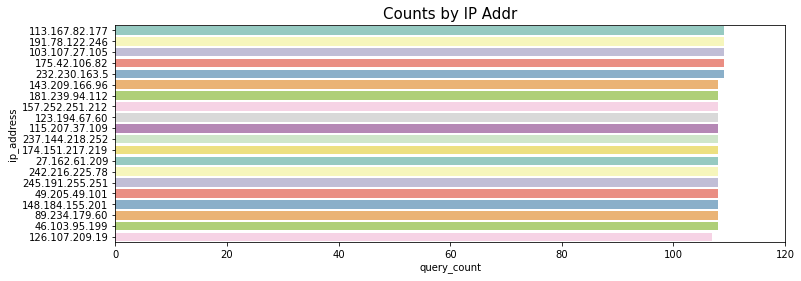

In [53]:
top_channels = queries.groupby("ip_address").size().reset_index(name="query_count").sort_values("query_count", ascending=False).head(20)

plt.figure(figsize = (12,4))

g = sns.barplot(x="query_count", y="ip_address", data=top_channels, palette="Set3")
g.set(xlim=(0, 120))
g.set_title("Counts by IP Addr", fontsize=15)


plt.show()

## Data Cleaning

### Transform timestamp into 24h values 

In [56]:
type(queries)

pandas.core.frame.DataFrame

In [57]:
queries.timestamp = queries.timestamp.round()

In [58]:
display(queries.head(n=3))

,ip_address,lat,lon,timestamp,poi_type_query
0,34.101.177.245,46.532942,6.591174,15.0,cafeteria
1,34.101.177.245,46.532942,6.591174,15.0,restaurant
2,34.101.177.245,46.550342,6.602852,18.0,restaurant


In [59]:
queries.timestamp = queries.timestamp.mod(24)

In [60]:
display(queries.head(n=10))

,ip_address,lat,lon,timestamp,poi_type_query
0,34.101.177.245,46.532942,6.591174,15.0,cafeteria
1,34.101.177.245,46.532942,6.591174,15.0,restaurant
2,34.101.177.245,46.550342,6.602852,18.0,restaurant
3,34.101.177.245,46.550342,6.602852,18.0,cafeteria
4,34.101.177.245,46.532942,6.591174,12.0,cafeteria
5,34.101.177.245,46.532942,6.591174,12.0,restaurant
6,34.101.177.245,46.550342,6.602852,17.0,dojo
7,34.101.177.245,46.550342,6.602852,17.0,restaurant
8,34.101.177.245,46.549880,6.609449,18.0,dojo
9,34.101.177.245,46.549880,6.609449,18.0,restaurant


### Map lat/lon to cell

#### Create dataframe with cell bounds (useless)

In [62]:
display(pois.head(n=3))

,poi_id,cell_id,poi_type,lat,lon
0,307,1,bar,46.504486,6.559631
1,331,1,bar,46.500259,6.554721
2,578,1,supermarket,46.506017,6.551165


In [67]:
all_cell_location = pois[['cell_id', 'lat', 'lon']]
display(all_cell_location.head(n=3))

,cell_id,lat,lon
0,1,46.504486,6.559631
1,1,46.500259,6.554721
2,1,46.506017,6.551165


In [84]:
cell_location = pd.DataFrame({'cell_id': all_cell_location['cell_id'].unique()})
cell_location.set_index('cell_id', inplace=True)
display(cell_location.head(n=3))

""
cell_id
1
2
3


In [85]:
all_cell_location.groupby(['cell_id']).min()

,lat,lon
cell_id,,
1,46.500259,6.550519
2,46.500285,6.563023
3,46.500748,6.571932
4,46.500051,6.580477
5,46.501472,6.590776
...,...,...
96,46.563737,6.600541
97,46.563505,6.610247
98,46.563743,6.620531


In [86]:
cell_location['min_lat'] = all_cell_location.groupby(['cell_id']).min().lat
cell_location['max_lat'] = all_cell_location.groupby(['cell_id']).max().lat
display(cell_location.head(n=3))

,min_lat,max_lat
cell_id,,
1,46.500259,46.506017
2,46.500285,46.506975
3,46.500748,46.505182


In [87]:
cell_location['min_lon'] = all_cell_location.groupby(['cell_id']).min().lon
cell_location['max_lon'] = all_cell_location.groupby(['cell_id']).max().lon
display(cell_location.head(n=3))

,min_lat,max_lat,min_lon,max_lon
cell_id,,,,
1,46.500259,46.506017,6.550519,6.559631
2,46.500285,46.506975,6.563023,6.569209
3,46.500748,46.505182,6.571932,6.575237


#### Using grid method

In [92]:
queries['cell_id'] = queries.apply(lambda x: location_to_cell_id(x.lat, x.lon), axis=1)
display(queries.head(n=3))

,ip_address,lat,lon,timestamp,poi_type_query,cell_id
0,34.101.177.245,46.532942,6.591174,15.0,cafeteria,45
1,34.101.177.245,46.532942,6.591174,15.0,restaurant,45
2,34.101.177.245,46.550342,6.602852,18.0,restaurant,76


### Identify most frequent cell_ids 

In [93]:
queries.groupby(['ip_address'])['cell_id'].agg(pd.Series.mode).to_frame()

,cell_id
ip_address,
0.98.248.97,18
10.229.150.53,85
100.255.65.73,76
101.193.212.180,58
103.107.27.105,58
...,...
94.220.204.193,82
94.223.68.192,56
95.146.245.203,84


#### Find most frequent during day vs night (work vs home)

In [99]:
queries.groupby(['ip_address'])['cell_id'].agg(lambda x:x.value_counts().index[0]).to_frame()

,cell_id
ip_address,
0.98.248.97,18
10.229.150.53,85
100.255.65.73,76
101.193.212.180,58
103.107.27.105,58
...,...
94.220.204.193,82
94.223.68.192,56
95.146.245.203,84


In [110]:
queries[(queries.timestamp > 9) & (queries.timestamp < 17)].groupby(['ip_address'])['cell_id'].agg(lambda x:x.value_counts().index[0]).to_frame()

,cell_id
ip_address,
0.98.248.97,63
10.229.150.53,63
100.255.65.73,35
101.193.212.180,63
103.107.27.105,63
...,...
94.220.204.193,98
94.223.68.192,35
95.146.245.203,34


In [111]:
queries[(queries.timestamp < 9) | (queries.timestamp > 17)].groupby(['ip_address'])['cell_id'].agg(lambda x:x.value_counts().index[0]).to_frame()

,cell_id
ip_address,
0.98.248.97,18
10.229.150.53,85
100.255.65.73,76
101.193.212.180,58
103.107.27.105,58
...,...
94.220.204.193,82
94.223.68.192,56
95.146.245.203,84
